### Подключение библиотек и загрузка данных

In [79]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv('diabetes_clean.csv')
print(diabetes_df.head())
print(diabetes_df.shape)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
(768, 9)


In [80]:
print(diabetes_df.columns)

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')


In [81]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Исключение аномалий

In [82]:
diabetes_df = diabetes_df[diabetes_df['bmi'] > 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] > 0]
diabetes_df = diabetes_df[diabetes_df['insulin'] > 0]

### Разбивка на X и y

In [83]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']

### Предсказание по одной переменной (BMI)

In [84]:
X_bmi = X[:, 4]
print(X_bmi)

[28.1 43.1 31.  30.5 30.1 25.8 45.8 43.3 34.6 39.3 36.6 31.1 23.2 22.2
 31.6 24.8 24.  37.1 34.  45.4 19.4 24.2 24.4 33.7 34.7 37.7 46.8 41.5
 25.4 19.6 28.9 32.9 28.6 35.1 29.3 32.4 38.5 37.1 32.  46.7 24.7 33.9
 20.4 28.7 49.7 26.6 28.7 29.5 34.3 37.4 33.3 34.  31.2 30.5 23.2 53.2
 33.6 55.  42.9 33.3 34.5 29.7 34.5 21.1 33.8 30.8 28.7 36.9 32.5 32.8
 30.5 37.4 34.3 40.6 24.6 25.2 29.  40.9 37.2 44.2 29.9 28.4 35.4 43.5
 29.7 32.7 67.1 34.9 30.1 32.  27.9 31.6 33.1 39.4 22.9 34.8 30.9 20.4
 37.7 37.5 33.2 42.6 34.2 41.8 35.8 30.  34.6 28.8 23.6 34.6 36.7 45.2
 46.2 25.4 29.7 35.9 33.1 27.1 38.2 52.3 35.4 24.4 27.6 25.9 33.3 30.9
 33.6 25.2 33.2 40.5 27.8 25.3 35.9 32.4 26.  38.7 45.6 20.8 36.1 36.9
 36.6 43.3 40.5 35.5 28.  30.7 36.6 31.6 35.8 39.7 25.5 24.8 30.5 32.9
 39.4 26.6 29.5 34.1 19.3 38.1 27.5 26.8 25.6 35.1 45.5 30.8 32.7 23.9
 47.9 34.2 25.9 25.9 38.5 28.7 21.8 27.2 33.3 35.3 36.5 31.2 34.9 34.
 27.5 32.8 38.4 35.8 34.9 36.2 39.2 25.2 37.2 43.4 30.8 25.4 25.1 24.3
 22.3 3

In [85]:
X_bmi_2 = diabetes_df[['bmi']].values
print(X_bmi_2)
print(X_bmi_2.shape)

[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]
 [33.3]


In [86]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi)
print(X_bmi.shape)

[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]
 [33.3]


### Просмотр данных

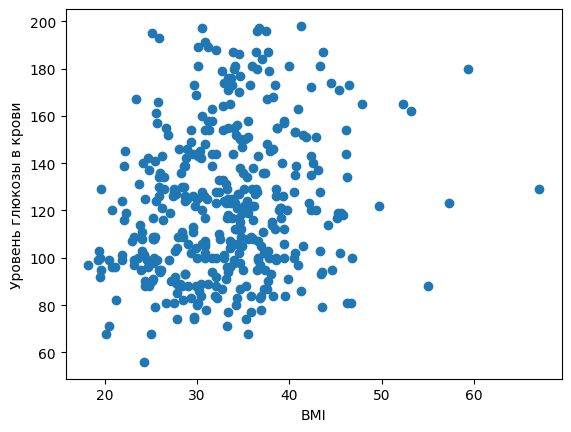

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()

### Создание модели

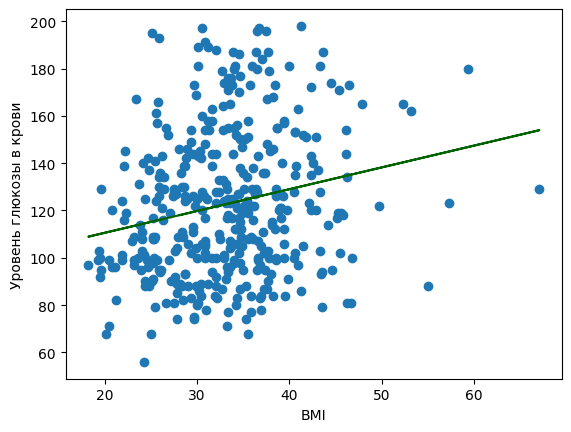

0.04389692023833025


In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='darkgreen')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()
print(reg.score(X_bmi, y))

### Предсказание по одной переменной (инсулин)

In [89]:
X_in = X[:, 3]
print(X_in)

[ 94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 115. 140. 110.
 245.  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 110. 142.
 128.  38. 100.  90. 140. 270.  71. 125.  71. 110. 176.  48.  64. 228.
  76.  64. 220.  40. 152. 140.  18.  36. 135. 495.  37. 175.  51. 100.
 100.  99. 135.  94. 145. 168. 225.  49. 140.  50.  92. 325.  63. 284.
 119. 204. 155. 485.  94. 135.  53. 114. 105. 285. 156.  78. 130.  48.
  55. 130. 130.  92. 495.  58. 114. 160.  94. 210.  48.  99. 318.  44.
 190. 280.  87. 130. 175. 271. 129. 120. 478. 190.  56.  32. 744.  53.
 370.  37.  45. 192.  88. 176. 194. 680. 402.  55. 258. 375. 150. 130.
  67.  56.  45.  57. 116. 278. 122. 155. 135. 545. 220.  49.  75.  40.
  74. 182. 194. 120. 360. 215. 184. 135.  42. 105. 132. 148. 180. 205.
 148.  96.  85.  94.  64. 140. 231.  29. 168. 156. 120.  68.  52.  58.
 255. 171. 105.  73. 108.  83.  74.  43. 167.  54. 249. 325. 293.  83.
  66. 140. 465.  66.  94. 158. 325.  84.  75.  72.  82. 182.  59. 110.
  50. 

In [90]:
X_in = X_in.reshape(-1, 1)
print(X_in)
print(X_in.shape)

[[ 94.]
 [168.]
 [ 88.]
 [543.]
 [846.]
 [175.]
 [230.]
 [ 83.]
 [ 96.]
 [235.]
 [146.]
 [115.]
 [140.]
 [110.]
 [245.]
 [ 54.]
 [192.]
 [207.]
 [ 70.]
 [240.]
 [ 82.]
 [ 36.]
 [ 23.]
 [300.]
 [342.]
 [304.]
 [110.]
 [142.]
 [128.]
 [ 38.]
 [100.]
 [ 90.]
 [140.]
 [270.]
 [ 71.]
 [125.]
 [ 71.]
 [110.]
 [176.]
 [ 48.]
 [ 64.]
 [228.]
 [ 76.]
 [ 64.]
 [220.]
 [ 40.]
 [152.]
 [140.]
 [ 18.]
 [ 36.]
 [135.]
 [495.]
 [ 37.]
 [175.]
 [ 51.]
 [100.]
 [100.]
 [ 99.]
 [135.]
 [ 94.]
 [145.]
 [168.]
 [225.]
 [ 49.]
 [140.]
 [ 50.]
 [ 92.]
 [325.]
 [ 63.]
 [284.]
 [119.]
 [204.]
 [155.]
 [485.]
 [ 94.]
 [135.]
 [ 53.]
 [114.]
 [105.]
 [285.]
 [156.]
 [ 78.]
 [130.]
 [ 48.]
 [ 55.]
 [130.]
 [130.]
 [ 92.]
 [495.]
 [ 58.]
 [114.]
 [160.]
 [ 94.]
 [210.]
 [ 48.]
 [ 99.]
 [318.]
 [ 44.]
 [190.]
 [280.]
 [ 87.]
 [130.]
 [175.]
 [271.]
 [129.]
 [120.]
 [478.]
 [190.]
 [ 56.]
 [ 32.]
 [744.]
 [ 53.]
 [370.]
 [ 37.]
 [ 45.]
 [192.]
 [ 88.]
 [176.]
 [194.]
 [680.]
 [402.]
 [ 55.]
 [258.]
 [375.]
 [150.]


### Просмотр данных

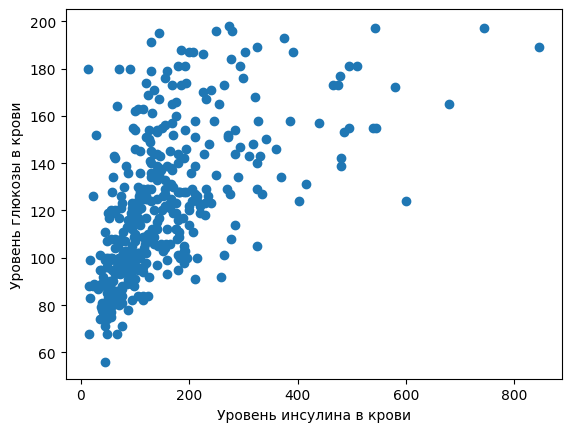

In [91]:
plt.scatter(X_in, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('Уровень инсулина в крови')
plt.show()

### Создание модели

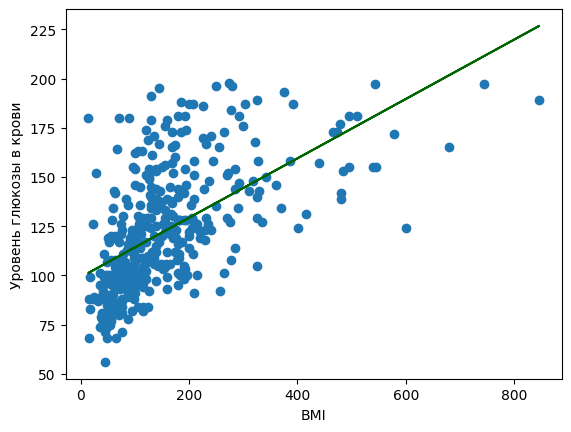

0.3378201900901525


In [92]:
reg = LinearRegression()
reg.fit(X_in, y)
predictions = reg.predict(X_in)
plt.scatter(X_in, y)
plt.plot(X_in, predictions, color='darkgreen')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()
print(reg.score(X_in, y))

### Линейная модель для множества признаков

In [93]:
diabetes_df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train).coef_

array([-0.12093905,  0.18444617,  0.16904719,  0.12351932, -0.03756664,
       -0.23302806,  0.3109031 , 20.26471566])

In [95]:
y_pred = reg_all.predict(X_test)

### R^2

In [96]:
reg_all.score(X_test, y_test)

0.4687834343348457

### RMSE

In [97]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

22.80048835176816

### Перекрестная проверка CV

In [98]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 12, shuffle=True, random_state=13)
reg = LinearRegression()
cv_res = cross_val_score(reg, X, y, cv=kf)

In [99]:
print(cv_res)

[0.3837229  0.59816537 0.44082292 0.42306968 0.50816624 0.05830558
 0.18324776 0.49906126 0.41605767 0.60529294 0.47997079 0.47754597]


### Гребневая регрессия

In [ ]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0, 0.01, 0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    print(alpha, ridge.coef_, ridge.intercept_)
print(scores)

0 [-0.12093905  0.18444617  0.16904719  0.12351932 -0.03756664 -0.23302806
  0.3109031  20.26471566] 70.7663969782604
0.01 [-0.12085608  0.18445607  0.16906121  0.12352395 -0.03752743 -0.2319177
  0.31092735 20.26057512] 70.76309075382841
0.1 [-0.12011113  0.18454483  0.16918709  0.12356555 -0.03717503 -0.22197277
  0.31114529 20.22339119] 70.73340759311134
1 [-0.11283313  0.18540562  0.17042248  0.12397297 -0.03370388 -0.12713444
  0.31329098 19.85938039] 70.44360375091088
10 [-5.37722987e-02  1.91974362e-01  1.80815598e-01  1.27342063e-01
 -3.66295781e-03  4.90038715e-01  3.31798583e-01  1.68555460e+01] 68.1034464752671
100 [0.12946931 0.20847675 0.21770207 0.13868822 0.11049652 0.83122365
 0.40214748 6.81656291] 60.83775945809184
1000 [0.18399383 0.21675921 0.2406383  0.14559961 0.17207577 0.16134704
 0.44465263 0.99573683] 57.356556494032716
[0.4687834343348444, 0.4687711195576295, 0.4686601457332129, 0.46753761367877944, 0.4558228848386707, 0.38667645281099305, 0.32671958760074704

### Лассо регрессия

In [104]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0, 0.01, 0.1, 1, 10, 20, 50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    print(alpha, lasso.coef_)
print(scores)

0 [-0.12093905  0.18444617  0.16904719  0.12351932 -0.03756664 -0.23302806
  0.3109031  20.26471566]
0.01 [-0.11649139  0.18479029  0.168892    0.12361191 -0.03687469 -0.12475871
  0.31039879 20.18378432]
0.1 [-0.083619    0.18489659  0.16795319  0.1243114  -0.02510527 -0.
  0.30886567 19.60419382]
1 [0.00000000e+00 1.93334387e-01 1.92011444e-01 1.30662594e-01
 1.06384899e-02 0.00000000e+00 3.41073848e-01 1.42974959e+01]
10 [0.         0.20927141 0.25354296 0.14959548 0.         0.
 0.41737595 0.        ]
20 [0.         0.17688189 0.18508719 0.15239122 0.         0.
 0.33664195 0.        ]
50 [0.         0.07600263 0.         0.16048748 0.         0.
 0.09236981 0.        ]
[0.46878343433484404, 0.46858004076918236, 0.4666331504458072, 0.4433508615824766, 0.3269082617994207, 0.33109063948313666, 0.32023346183326995]


/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.618e+04, tolerance: 2.937e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solve